In [1]:
import geopandas as gpd
import pandas as pd
import os

os.chdir(r'/Users/sukantodas/Documents/work/ioer/files/pubdis')


In [2]:
ct = gpd.read_file("city.gpkg")

In [3]:
ct.head()

,value-einh,Indikatorn,ags,gen,value,city,area_sqkm,geometry
0,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,05911000,Bochum,67.9072252739566,Bochum,144.268,"MULTIPOLYGON (((383072.925 5709257.907, 382468..."
1,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,09663000,Würzburg,46.5050911140791,Würzburg,87.858,"MULTIPOLYGON (((566294.183 5521765.284, 568425..."
2,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,08415061,Reutlingen,35.5379117506555,Reutlingen,85.284,"MULTIPOLYGON (((518445.079 5380095.039, 518772..."
3,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,02000000,Hamburg,58.2160082150446,Hamburg,741.188,"MULTIPOLYGON (((578557.698 5954292.377, 578746..."
4,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,07133006,Bad Kreuznach,32.6743874621805,Bad Kreuznach,54.090,"MULTIPOLYGON (((418491.722 5525780.492, 419375..."


<Axes: >

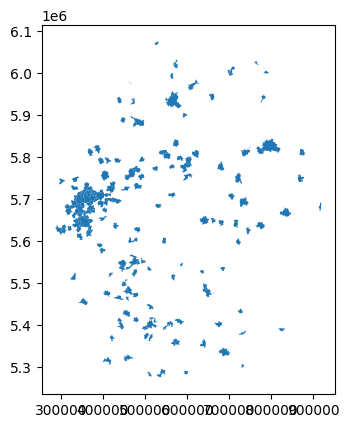

In [4]:
ct.plot()

In [5]:
ct["centroid"] = ct["geometry"].centroid

In [6]:
ct.head()

,value-einh,Indikatorn,ags,gen,value,city,area_sqkm,geometry,centroid
0,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,05911000,Bochum,67.9072252739566,Bochum,144.268,"MULTIPOLYGON (((383072.925 5709257.907, 382468...",POINT (376722.017 5703495.949)
1,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,09663000,Würzburg,46.5050911140791,Würzburg,87.858,"MULTIPOLYGON (((566294.183 5521765.284, 568425...",POINT (567706.010 5515130.008)
2,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,08415061,Reutlingen,35.5379117506555,Reutlingen,85.284,"MULTIPOLYGON (((518445.079 5380095.039, 518772...",POINT (513956.297 5371350.534)
3,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,02000000,Hamburg,58.2160082150446,Hamburg,741.188,"MULTIPOLYGON (((578557.698 5954292.377, 578746...",POINT (567265.447 5933672.427)
4,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,07133006,Bad Kreuznach,32.6743874621805,Bad Kreuznach,54.090,"MULTIPOLYGON (((418491.722 5525780.492, 419375...",POINT (418613.008 5521166.804)


In [7]:
import matplotlib.pyplot as plt

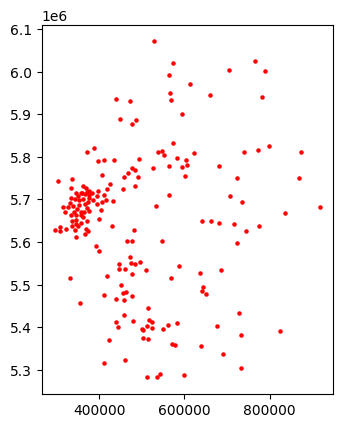

In [8]:
# Plot the centroids using Matplotlib
fig, ax = plt.subplots()
#ct.plot(ax=ax)
ct["centroid"].plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()

In [9]:
centroid_gdf = gpd.GeoDataFrame(geometry=ct["centroid"])

# Save the centroids as a new GeoPackage file
centroid_gdf.to_file("centroids.gpkg", driver="GPKG")

In [10]:
cn = gpd.read_file("centroids.gpkg")

<Axes: >

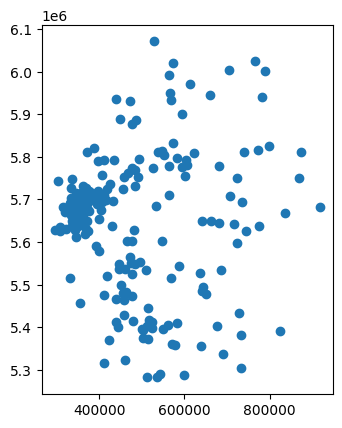

In [11]:
cn.plot()

In [12]:
cn.head()

,geometry
0,POINT (376722.017 5703495.949)
1,POINT (567706.010 5515130.008)
2,POINT (513956.297 5371350.534)
3,POINT (567265.447 5933672.427)
4,POINT (418613.008 5521166.804)


In [13]:
# Perform spatial join
spatial_join = gpd.sjoin(cn, ct, how="left", op="intersects")

/Users/sukantodas/anaconda3/envs/pubdis/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [14]:
spatial_join.head()

,geometry,index_right,value-einh,Indikatorn,ags,gen,value,city,area_sqkm,centroid
0,POINT (376722.017 5703495.949),0,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,05911000,Bochum,67.9072252739566,Bochum,144.268,POINT (376722.017 5703495.949)
1,POINT (567706.010 5515130.008),1,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,09663000,Würzburg,46.5050911140791,Würzburg,87.858,POINT (567706.010 5515130.008)
2,POINT (513956.297 5371350.534),2,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,08415061,Reutlingen,35.5379117506555,Reutlingen,85.284,POINT (513956.297 5371350.534)
3,POINT (567265.447 5933672.427),3,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,02000000,Hamburg,58.2160082150446,Hamburg,741.188,POINT (567265.447 5933672.427)
4,POINT (418613.008 5521166.804),4,%,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,07133006,Bad Kreuznach,32.6743874621805,Bad Kreuznach,54.090,POINT (418613.008 5521166.804)


In [15]:
spatial_join = spatial_join.drop(columns=["value-einh"])

In [16]:
spatial_join.head()

,geometry,index_right,Indikatorn,ags,gen,value,city,area_sqkm,centroid
0,POINT (376722.017 5703495.949),0,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,05911000,Bochum,67.9072252739566,Bochum,144.268,POINT (376722.017 5703495.949)
1,POINT (567706.010 5515130.008),1,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,09663000,Würzburg,46.5050911140791,Würzburg,87.858,POINT (567706.010 5515130.008)
2,POINT (513956.297 5371350.534),2,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,08415061,Reutlingen,35.5379117506555,Reutlingen,85.284,POINT (513956.297 5371350.534)
3,POINT (567265.447 5933672.427),3,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,02000000,Hamburg,58.2160082150446,Hamburg,741.188,POINT (567265.447 5933672.427)
4,POINT (418613.008 5521166.804),4,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,07133006,Bad Kreuznach,32.6743874621805,Bad Kreuznach,54.090,POINT (418613.008 5521166.804)


In [17]:
spatial_join = spatial_join.drop(columns=["gen"])

In [18]:
spatial_join.head()

,geometry,index_right,Indikatorn,ags,value,city,area_sqkm,centroid
0,POINT (376722.017 5703495.949),0,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,05911000,67.9072252739566,Bochum,144.268,POINT (376722.017 5703495.949)
1,POINT (567706.010 5515130.008),1,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,09663000,46.5050911140791,Würzburg,87.858,POINT (567706.010 5515130.008)
2,POINT (513956.297 5371350.534),2,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,08415061,35.5379117506555,Reutlingen,85.284,POINT (513956.297 5371350.534)
3,POINT (567265.447 5933672.427),3,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,02000000,58.2160082150446,Hamburg,741.188,POINT (567265.447 5933672.427)
4,POINT (418613.008 5521166.804),4,Anteil Siedlungs- und Verkehrsfläche an Gebiet...,07133006,32.6743874621805,Bad Kreuznach,54.090,POINT (418613.008 5521166.804)


In [19]:
spatial_join["geometry"].geom_type.unique()

array(['Point'], dtype=object)

In [24]:
spatial_join = spatial_join[['geometry', 'city', 'area_sqkm', 'centroid']]

In [25]:
spatial_join.head()

,geometry,city,area_sqkm,centroid
0,POINT (376722.017 5703495.949),Bochum,144.268,POINT (376722.017 5703495.949)
1,POINT (567706.010 5515130.008),Würzburg,87.858,POINT (567706.010 5515130.008)
2,POINT (513956.297 5371350.534),Reutlingen,85.284,POINT (513956.297 5371350.534)
3,POINT (567265.447 5933672.427),Hamburg,741.188,POINT (567265.447 5933672.427)
4,POINT (418613.008 5521166.804),Bad Kreuznach,54.090,POINT (418613.008 5521166.804)


In [27]:
print(spatial_join.columns)

Index(['geometry', 'city', 'area_sqkm', 'centroid'], dtype='object')


In [31]:
spatial_join.head()

,geometry,city,area_sqkm,centroid
0,POINT (376722.01676356036 5703495.948581486),Bochum,144.268,POINT (376722.017 5703495.949)
1,POINT (567706.0095388949 5515130.008202742),Würzburg,87.858,POINT (567706.010 5515130.008)
2,POINT (513956.2966414125 5371350.5336502725),Reutlingen,85.284,POINT (513956.297 5371350.534)
3,POINT (567265.4471941366 5933672.427041147),Hamburg,741.188,POINT (567265.447 5933672.427)
4,POINT (418613.0082846368 5521166.803975908),Bad Kreuznach,54.090,POINT (418613.008 5521166.804)
